In [1]:
# importing libraries
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import dlib
import numpy as np

In [2]:
#torch.cuda.is_available()

In [3]:
'''from pathlib import PurePath
import os
import shutil

def remove_null():
    files = os.listdir('lfw-deepfunneled/')
    for file in files:
        path_list = list(PurePath('lfw-deepfunneled/').parts)
        path_list.insert(2, file)
        file_path = PurePath('').joinpath(*path_list)
        sub_file_list = os.listdir(file_path)
        if len(sub_file_list) == 1 :
            shutil.rmtree(file_path) '''

"from pathlib import PurePath\nimport os\nimport shutil\n\ndef remove_null():\n    files = os.listdir('lfw-deepfunneled/')\n    for file in files:\n        path_list = list(PurePath('lfw-deepfunneled/').parts)\n        path_list.insert(2, file)\n        file_path = PurePath('').joinpath(*path_list)\n        sub_file_list = os.listdir(file_path)\n        if len(sub_file_list) == 1 :\n            shutil.rmtree(file_path) "

In [4]:
# remove_null()

In [5]:
'''import splitfolders
input_folder = 'lfw-deepfunneled/'
splitfolders.ratio(input_folder,output="lfw_split", seed=42, ratio=(.8,.0,.2), group_prefix=None)'''

'import splitfolders\ninput_folder = \'lfw-deepfunneled/\'\nsplitfolders.ratio(input_folder,output="lfw_split", seed=42, ratio=(.8,.0,.2), group_prefix=None)'

In [6]:
mtcnn = MTCNN(image_size=240, margin=0, min_face_size=20, device= 'cpu')
resnet = InceptionResnetV1(pretrained='vggface2', device='cpu').eval()

dataset=datasets.ImageFolder('lfw_split/train/')
print(len(dataset))
idx_to_class = {i:c for c,i in dataset.class_to_idx.items()} 
def collate_fn(x):
    return x[0]

loader = DataLoader(dataset, collate_fn=collate_fn)

face_list = [] 
name_list = [] 
embedding_list = [] 



40


In [7]:
import cv2
import matplotlib.pyplot as plt
import dlib
import numpy as np

from imutils import face_utils

font = cv2.FONT_HERSHEY_SIMPLEX



cascPath = "C:/Users/s.ezati/.conda/envs/myenv/lib/site-packages/cv2/data/haarcascade_frontalface_alt.xml"
faceCascade = cv2.CascadeClassifier(cascPath)#cv2.data.haarcascades+

In [8]:



for img, idx in loader:
    # Detect faces
    #print(type(img))
    image =  np.array(img)
   # print(type(image))
    #print(type(img))
    faces = faceCascade.detectMultiScale(
                                    image,
                                    scaleFactor=1.1,
                                    minNeighbors=5,
                                    flags=cv2.CASCADE_SCALE_IMAGE
                                    )
    
    for [x, y, w, h] in faces: 
        crop = image[y:y+h, x:x+w]
    
    if crop is None:
        img___ = image
    else:
        img___= crop
    #print(type(crop))
    imgplot = Image.fromarray(crop)#plt.imshow(crop, cmap='gray')
    #print(type(imgplot))
    face, prob = mtcnn(imgplot, return_prob=True) 
    if face is not None and prob>0.90: # if face detected and porbability > 90%
        emb = resnet(face.unsqueeze(0)) # passing cropped face into resnet model to get embedding matrix
        embedding_list.append(emb.detach()) # resulten embedding matrix is stored in a list
        name_list.append(idx_to_class[idx]) # names are stored in a list





print(len(face_list))
print(len(name_list))
print(len(embedding_list))


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


0
40
40


In [9]:
data = [embedding_list, name_list]
torch.save(data, 'data.pt') 

1
lfw_split/test\Aaron_Peirsol\Aaron_Peirsol_0001.jpg


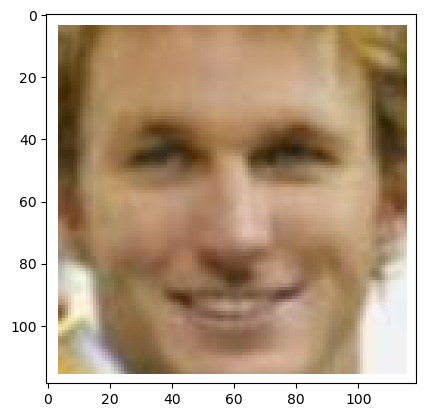

Face matched with: ( Aaron Peirsol ) With distance:  0.5500380396842957
2
lfw_split/test\Aaron_Sorkin\Aaron_Sorkin_0001.jpg


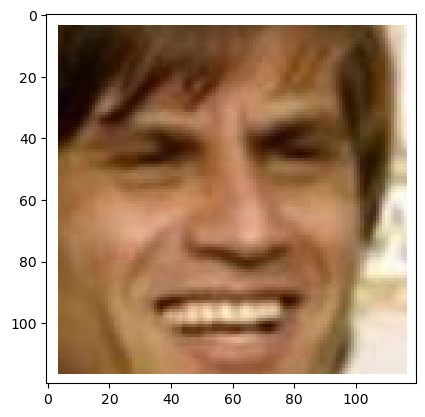

Face matched with: ( Aaron Sorkin ) With distance:  0.9254019856452942
3
lfw_split/test\Abdel_Nasser_Assidi\Abdel_Nasser_Assidi_0001.jpg


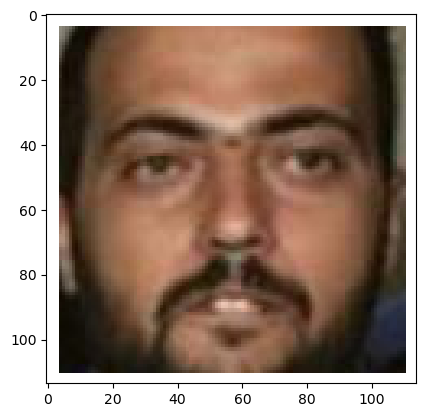

Face matched with: ( Abdel Nasser Assidi ) With distance:  0.5152334570884705
4
lfw_split/test\Abdoulaye_Wade\Abdoulaye_Wade_0001.jpg


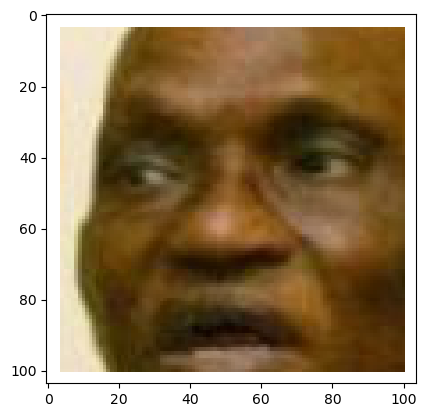

Face matched with: ( Abdoulaye Wade ) With distance:  0.638288140296936
5
lfw_split/test\Abdullah\Abdullah_0001.jpg


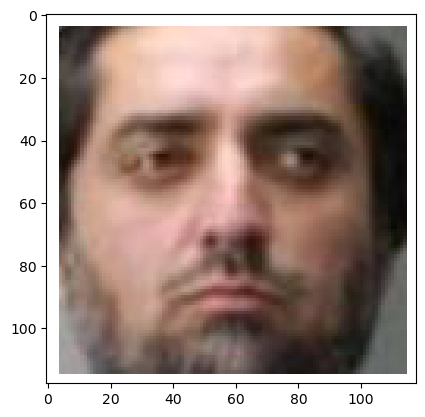

Face matched with: ( Abdullah ) With distance:  0.7313805818557739
6
lfw_split/test\Abdullah_al-Attiyah\Abdullah_al-Attiyah_0003.jpg


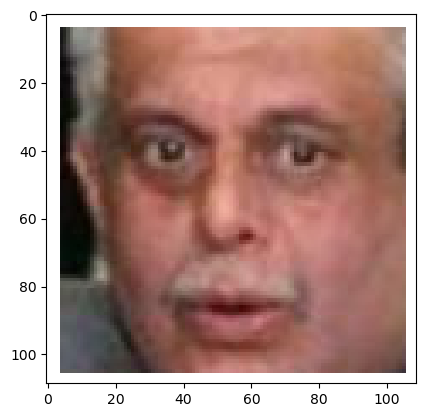

Face matched with: ( Abdullah al-Attiyah ) With distance:  0.5179766416549683
7
lfw_split/test\Abdullah_Gul\Abdullah_Gul_0001.jpg


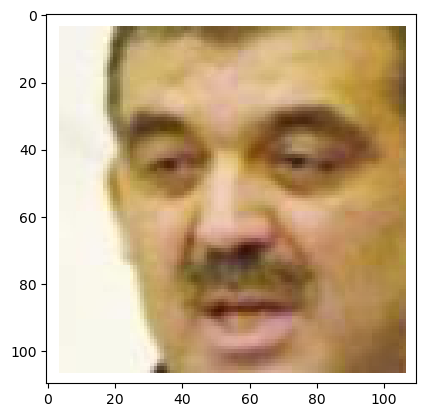

Face matched with: ( Abdullah Gul ) With distance:  0.5457016229629517
8
lfw_split/test\Abdullah_Gul\Abdullah_Gul_0004.jpg


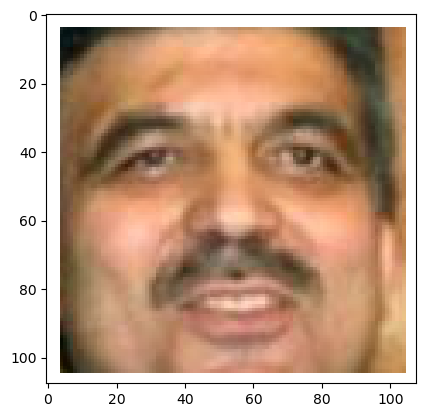

Face matched with: ( Abdullah Gul ) With distance:  0.392447292804718
9
lfw_split/test\Abdullah_Gul\Abdullah_Gul_0008.jpg


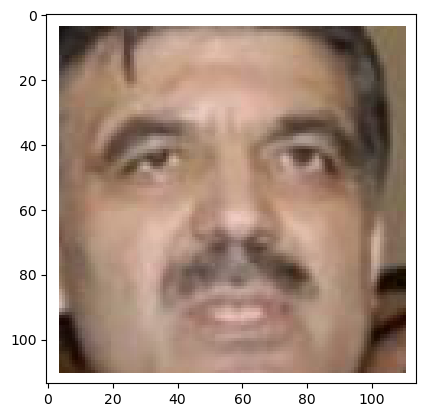

Face matched with: ( Abdullah Gul ) With distance:  0.4614962041378021
10
lfw_split/test\Abdullah_Gul\Abdullah_Gul_0009.jpg


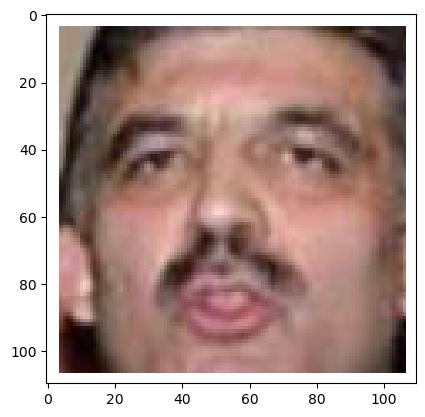

Face matched with: ( Abdullah Gul ) With distance:  0.6421111226081848
11
lfw_split/test\Abdullatif_Sener\Abdullatif_Sener_0001.jpg


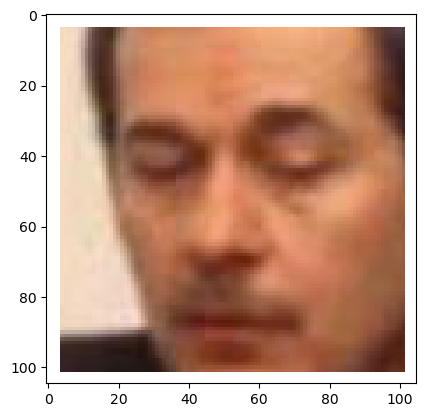

Face matched with: ( Adolfo Rodriguez Saa ) With distance:  0.8672605752944946
12
lfw_split/test\Abel_Pacheco\Abel_Pacheco_0001.jpg


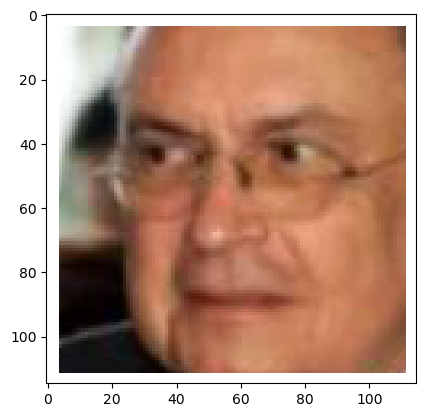

Face matched with: ( Abel Pacheco ) With distance:  0.7648877501487732
13
lfw_split/test\Abid_Hamid_Mahmud_Al-Tikriti\Abid_Hamid_Mahmud_Al-Tikriti_0003.jpg


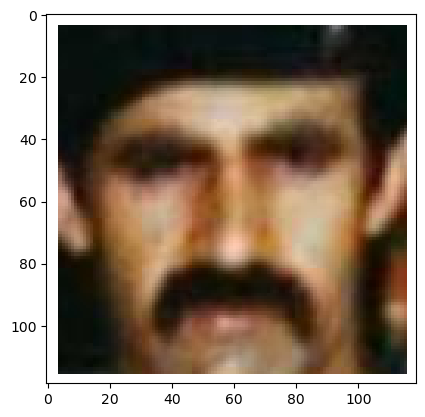

Face matched with: ( Abid Hamid Mahmud Al-Tikriti ) With distance:  0.6937467455863953
14
lfw_split/test\Adam_Sandler\Adam_Sandler_0001.jpg


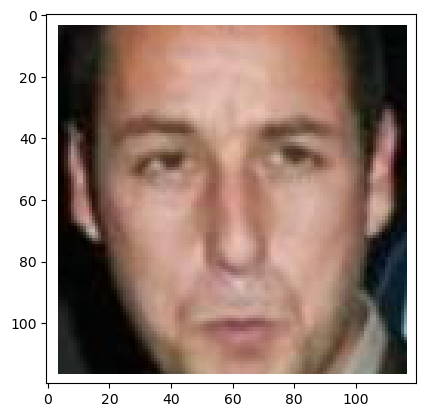

Face matched with: ( Adam Sandler ) With distance:  0.7919948101043701
15
lfw_split/test\Adam_Scott\Adam_Scott_0001.jpg


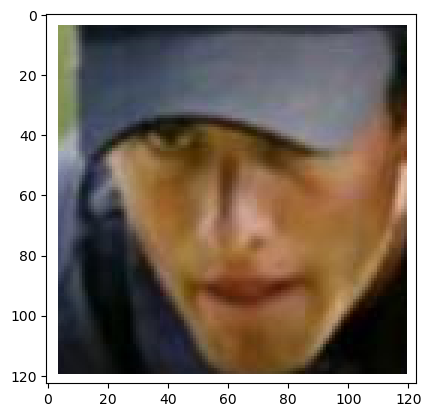

Face matched with: ( Adrian McPherson ) With distance:  0.9432317018508911
16
lfw_split/test\Adel_Al-Jubeir\Adel_Al-Jubeir_0003.jpg


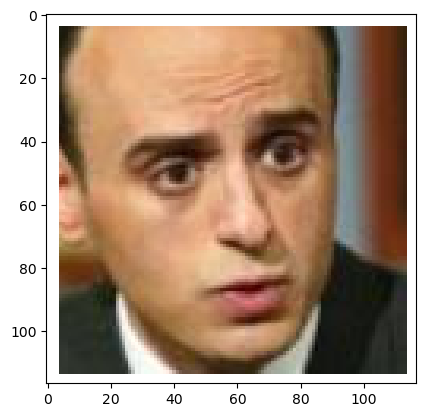

Face matched with: ( Adel Al-Jubeir ) With distance:  0.528246283531189
17
lfw_split/test\Adolfo_Aguilar_Zinser\Adolfo_Aguilar_Zinser_0003.jpg


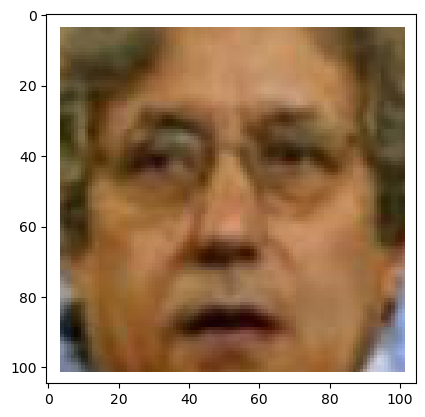

Face matched with: ( Adolfo Aguilar Zinser ) With distance:  0.6022465229034424
18
lfw_split/test\Adolfo_Rodriguez_Saa\Adolfo_Rodriguez_Saa_0001.jpg


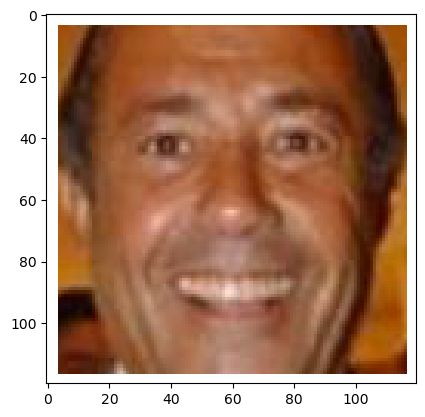

Face matched with: ( Adolfo Rodriguez Saa ) With distance:  0.6749395132064819
19
lfw_split/test\Adrian_McPherson\Adrian_McPherson_0001.jpg


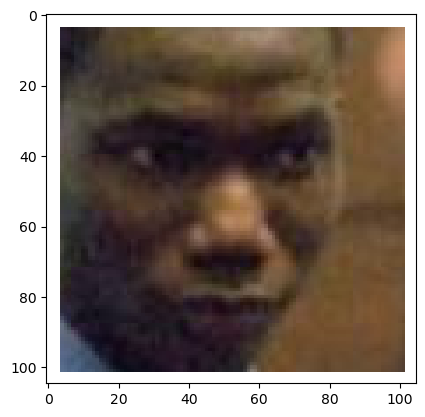

Face matched with: ( Abdoulaye Wade ) With distance:  0.7528798580169678
['AaronPeirsol', 'AaronSorkin', 'AbdelNasserAssidi', 'AbdoulayeWade', 'Abdullah', 'Abdullahal-Attiyah', 'AbdullahGul', 'AbdullahGul', 'AbdullahGul', 'AbdullahGul', 'AbdullatifSener', 'AbelPacheco', 'AbidHamidMahmudAl-Tikriti', 'AdamSandler', 'AdamScott', 'AdelAl-Jubeir', 'AdolfoAguilarZinser', 'AdolfoRodriguezSaa', 'AdrianMcPherson']
['AaronPeirsol', 'AaronSorkin', 'AbdelNasserAssidi', 'AbdoulayeWade', 'Abdullah', 'Abdullahal-Attiyah', 'AbdullahGul', 'AbdullahGul', 'AbdullahGul', 'AbdullahGul', 'AdolfoRodriguezSaa', 'AbelPacheco', 'AbidHamidMahmudAl-Tikriti', 'AdamSandler', 'AdrianMcPherson', 'AdelAl-Jubeir', 'AdolfoAguilarZinser', 'AdolfoRodriguezSaa', 'AbdoulayeWade']


In [10]:
def face_match(img_path, data_path): 

    img_s = Image.open(img_path)
    img = np.array(img_s)
    faces = faceCascade.detectMultiScale(
                                    img,
                                    scaleFactor=1.1,
                                    minNeighbors=5,
                                    minSize=(30, 30),
                                    flags=cv2.CASCADE_FIND_BIGGEST_OBJECT
                                    )
  #  crop = img
    for face in faces: 
        x, y, w, h = face
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),5)
        crop = img[y:y+h, x:x+w]
 
    imgplot = Image.fromarray(crop)#plt.imshow(crop, cmap='gray')    
    face, prob = mtcnn(imgplot, return_prob=True) 
    plt.imshow(imgplot)
    plt.show()
    emb = resnet(face.unsqueeze(0)).detach() 
    
    saved_data = torch.load('data.pt') 
    embedding_list = saved_data[0] 
    name_list = saved_data[1] 
    dist_list = [] 
    
    for idx, emb_db in enumerate(embedding_list):
        dist = torch.dist(emb, emb_db).item()
        dist_list.append(dist)
        
    idx_min = dist_list.index(min(dist_list))
    return (name_list[idx_min].replace('_',' '), min(dist_list))

test_path = "lfw_split/test/"

from PIL import Image
import glob
image_list = []
y_real = []
for filename in glob.glob('lfw_split/test/*/*.jpg'): #assuming gif
    image_list.append(filename)
    y_real.append(filename.split('\\')[1].split('0')[0].replace('_','').replace('.jpg',''))
    
predict_y = []
count = 1
for i in image_list:   
    print(count)
    print(i)

    result = face_match(i, 'data.pt')
    predict_y.append(result[0].replace(' ',''))
    count =count + 1
    print('Face matched with: (',result[0], ') With distance: ',result[1])
    
print(y_real)
print(predict_y)

In [11]:
print(len(y_real))
print(len(predict_y))
print(type(y_real))



19
19
<class 'list'>


In [12]:
accuracy_marker = []
conf_y_real = []
conf_y_pred = []
marker = 0
for i in range(0,len(y_real)):
   # print(y[i])
   # print(predict_y[i])
    conf_y_real.append(0)
    if (y_real[i] == predict_y[i]) is True:
        accuracy_marker.append(0)
        conf_y_pred.append(0)
        marker +=1
    else:
        accuracy_marker.append(1)
        conf_y_pred.append(1)

    
print("accuracy:",marker/len(accuracy_marker))


accuracy: 0.8421052631578947


In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(conf_y_real,conf_y_pred)

sn.heatmap(confusion_matrix, annot=True)
plt.show()

ImportError: cannot import name 'VectorPlotter' from 'seaborn._core' (C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\seaborn\_core\__init__.py)

#### accuracy : 77%

#### problem : haara is not good for faces except frontFaces